# Hindmarsh-Rose model

Hindmarsh-Rose model is a neuron model. It is composed of 3 differential equations and can generate several firing patterns by tuning patterns.

In [1]:
import brainpy as bp
import numpy as np
import bpmodels
import matplotlib.pyplot as plt

bp.profile.set(jit=True, dt=0.02)

In [2]:
params = {
    'quiescence': {'b': 1., 'I': 2.0},
    'spiking': {'b': 3.5, 'I': 5.0},
    'bursting': {'b': 2.5, 'I': 3.0},
    'irregular_spiking': {'b': 2.95, 'I': 3.3},
    'irregular_bursting': {'b': 2.8, 'I': 3.7},
}

In [3]:
# define neuron type
HindmarshRose_neuron = bpmodels.neurons.get_HindmarshRose()

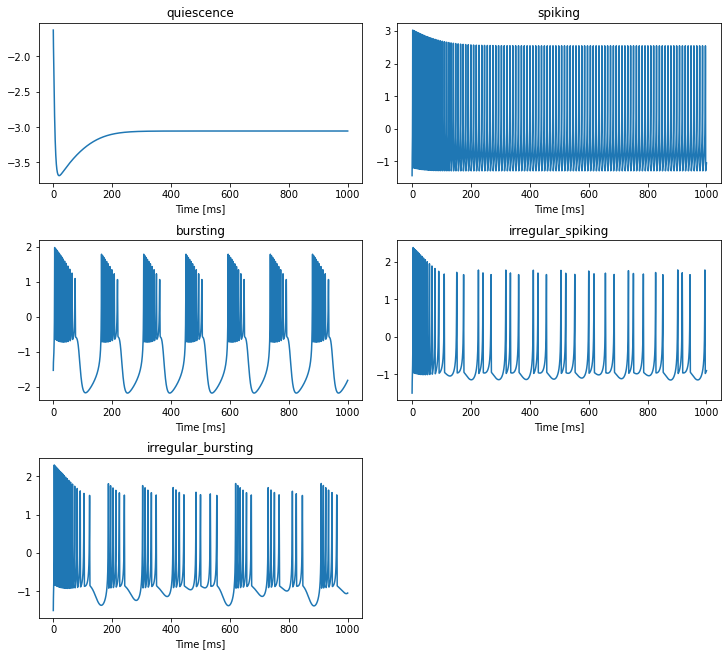

In [4]:
fig, gs = bp.visualize.get_figure(n_row=3, n_col=2, len_row=3, len_col=5)
for i, (mode, par) in enumerate(params.items()):
    
    # build neuron group
    neu = bp.NeuGroup(HindmarshRose_neuron, geometry=1, monitors=['V', 'y', 'z'])
    neu.pars['b'] = par['b']

    # simulate
    neu.run(duration=1000., inputs=["ST.input", par['I']], report=False)
    
    # plot
    fig.add_subplot(gs[i // 2, i % 2])
    plt.plot(neu.mon.ts, neu.mon.V)
    plt.title(mode)
    plt.xlabel('Time [ms]')
plt.show()